# 🌏 Climate Change Analysis Across Indian States  
**Course-End Project | Data Analysis & Visualization**  

👨‍🎓 Student: BANAVATH ANUSHA  
🏫 College: CBIT  
📅 Date: April 2025  

---

**Objective**:
This project analyzes and visualizes temperature change across Indian states using data from 1901–2015.

**Libraries used:** pandas, numpy, matplotlib, seaborn.

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Google Colab: upload file
from google.colab import files
uploaded = files.upload()


Saving climate.csv to climate.csv


In [2]:
# Load dataset
df = pd.read_csv('climate.csv')
df.dropna(inplace=True)
df['Year'] = df['Year'].astype(int)
df.head()


,State,Year,Temperature
0,Kerala,1901,25.1
1,Kerala,2015,27.5
2,Tamil Nadu,1901,26.0
3,Tamil Nadu,2015,28.2
4,Maharashtra,1901,24.0


In [3]:
print(df.shape)
print(df.columns)
print(df['State'].nunique(), "states")
print(df['Year'].min(), "to", df['Year'].max())
df.describe()


(16, 3)
Index(['State', 'Year', 'Temperature'], dtype='object')
8 states
1901 to 2015


,Year,Temperature
count,16.000000,16.000000
mean,1958.000000,25.562500
std,58.869347,1.678839
min,1901.000000,22.500000
25%,1901.000000,24.375000
50%,1958.000000,25.450000
75%,2015.000000,26.775000
max,2015.000000,28.200000


In [4]:
latest_year = df['Year'].max()
top_states = df[df['Year'] == latest_year].groupby('State')['Temperature'].mean().sort_values(ascending=False).head(10).index.tolist()
top_states


['Tamil Nadu',
 'West Bengal',
 'Kerala',
 'Gujarat',
 'Maharashtra',
 'Rajasthan',
 'Punjab',
 'Uttar Pradesh']

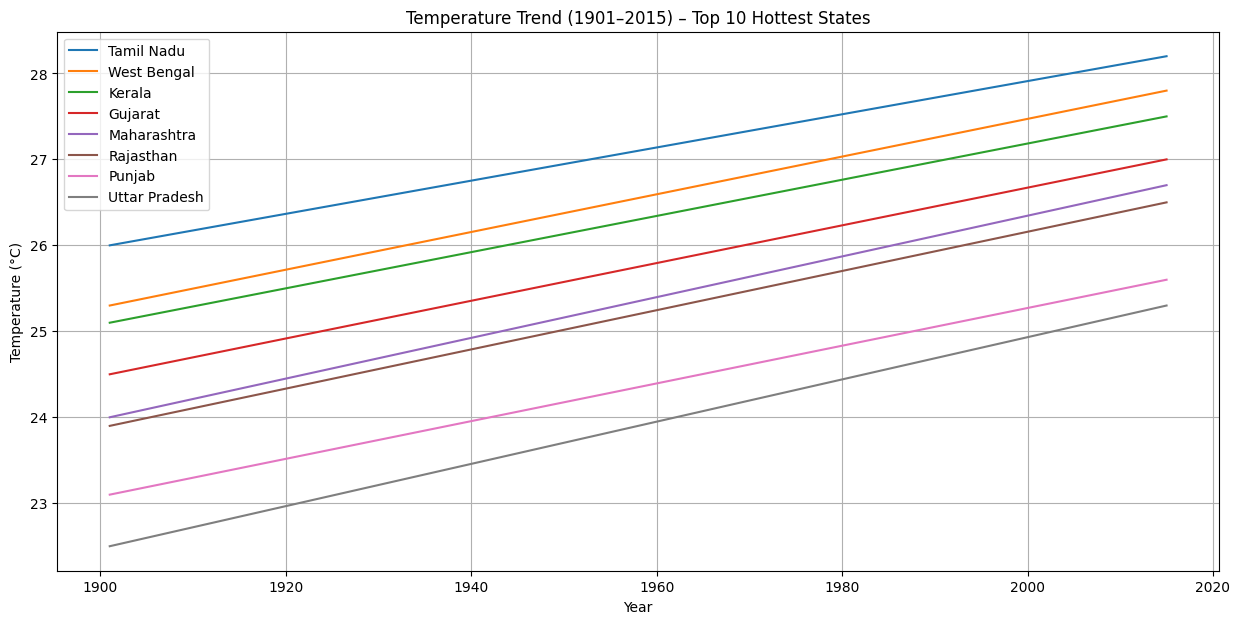

In [5]:
plt.figure(figsize=(15, 7))
for state in top_states:
    temp_trend = df[df['State'] == state]
    plt.plot(temp_trend['Year'], temp_trend['Temperature'], label=state)

plt.title('Temperature Trend (1901–2015) – Top 10 Hottest States')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()


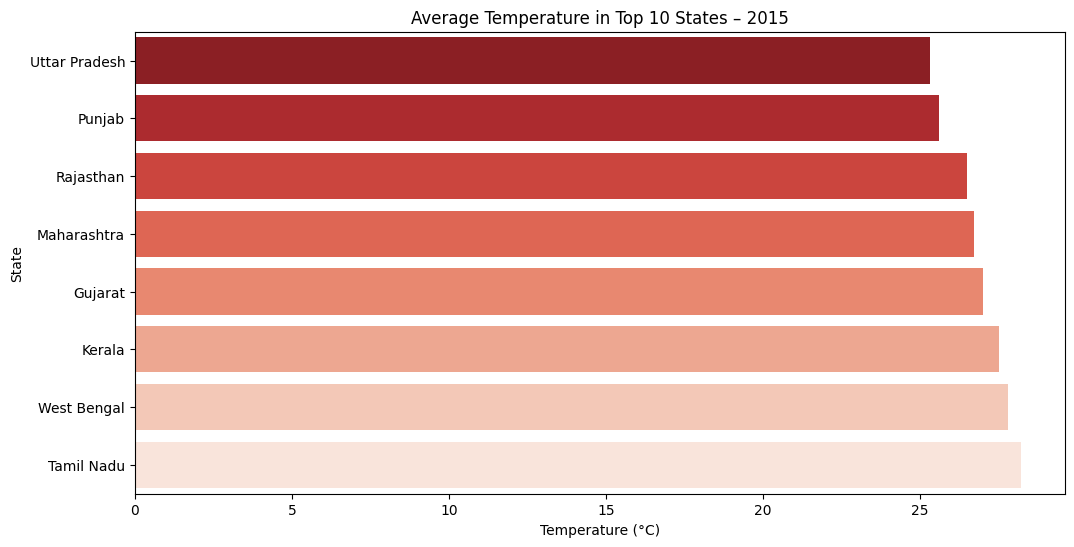

In [6]:
bar_data = df[df['Year'] == latest_year]
avg_temp = bar_data[bar_data['State'].isin(top_states)].groupby('State')['Temperature'].mean().sort_values(ascending=True)

# Convert to DataFrame and plot with hue to avoid warning
bar_df = avg_temp.reset_index()
bar_df.columns = ['State', 'Temperature']

plt.figure(figsize=(12, 6))
sns.barplot(data=bar_df, x='Temperature', y='State', hue='State', palette='Reds_r', dodge=False, legend=False)
plt.title(f'Average Temperature in Top 10 States – {latest_year}')
plt.xlabel('Temperature (°C)')
plt.ylabel('State')
plt.show()


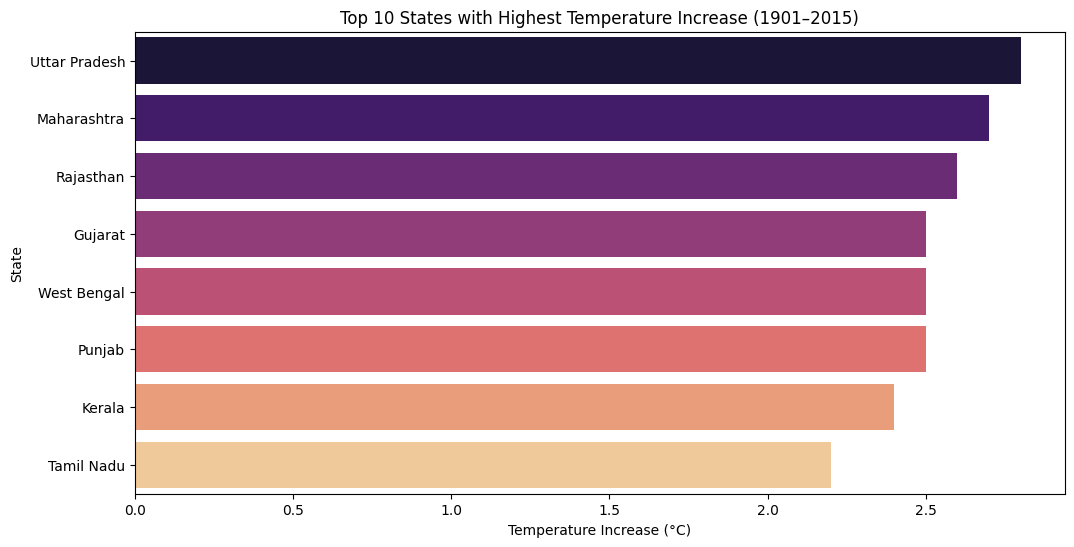

In [9]:
# Reset index to convert index into a column
change_df = temp_change_sorted.reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=change_df, x='Change', y='State', hue='State', palette='magma', dodge=False, legend=False)
plt.title('Top 10 States with Highest Temperature Increase (1901–2015)')
plt.xlabel('Temperature Increase (°C)')
plt.ylabel('State')
plt.show()



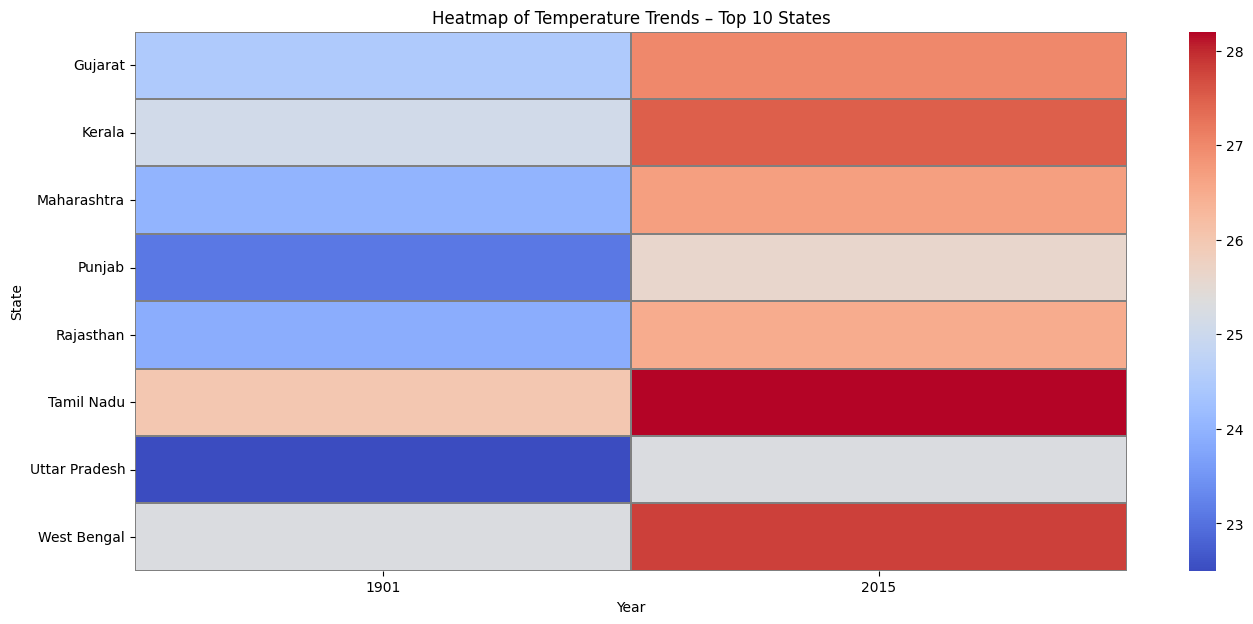

In [8]:
heat_df = df[df['State'].isin(top_states)]
pivot = heat_df.pivot_table(index='State', columns='Year', values='Temperature')

plt.figure(figsize=(16, 7))
sns.heatmap(pivot, cmap='coolwarm', linewidths=0.2, linecolor='gray')
plt.title('Heatmap of Temperature Trends – Top 10 States')
plt.xlabel('Year')
plt.ylabel('State')
plt.show()
